**Problem Statement :**

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

**Business Goal :**

- Build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Determine the optimal value of lambda for ridge and lasso regression.
- This model will then be used by the management to understand how exactly the prices vary with the variables
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- The model will be a good way for the management to understand the pricing dynamics of a new market.

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# for model building
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [79]:
housing_df = pd.read_csv("train.csv")
housing_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [80]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [82]:
# Checking the percentage of Null values in all the columns
print(round(housing_df.isnull().sum()/len(housing_df.index)*100,2).sort_values(ascending=False)[round(housing_df.isnull().sum()/len(housing_df.index),2) > 0])

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


In [83]:
# Separating the Numerical and Categorical features for analysis
numeric_df = housing_df.select_dtypes(include=['int64', 'float64'])
categorical_df = housing_df.select_dtypes(include=['object'])

In [84]:
# Numerical features in the dataframe
numeric_df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

### Analyzing Numerical Data

#### Outlier Detection
##### Checking percentage of outliers for all the numerical columns.

In [85]:
outliers_percentage={}

for feature in numeric_df.columns:
    IQR=numeric_df[feature].quantile(.75)-numeric_df[feature].quantile(.25)
    outliers_count=numeric_df[(numeric_df[feature]>(numeric_df[feature].quantile(.75)+1.5*IQR)) | (numeric_df[feature]<(numeric_df[feature].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percentage[feature]=round(outliers_count/numeric_df.shape[0]*100,2)
    
outlier_df=pd.DataFrame({'Features':list(outliers_percentage.keys()),'Percentage':list(outliers_percentage.values())})
outlier_df.sort_values(by="Percentage", ascending=False)

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


**Inference:**
  - Majority of the numeric features have outliers
  - Dropping all the outliers will cause loss of information.
  - Hence reassigning fixed minimum and maximum values to those rows where feature value is outside the range of [25th percentile - 1.5 * IQR, 75th percentile + 1.5 * IQR]
  - IQR or Inter Quartile Range = Difference between 75th percentile and 25th percentile values of a feature.
  - Target column 'SalePrice' is excluded in this

In [86]:
for feature,percentage in outliers_percentage.items():
    if feature!='SalePrice':
        IQR = housing_df[feature].quantile(.75) - housing_df[feature].quantile(.25) 
        max_value = housing_df[feature].quantile(.75)+1.5*IQR
        min_value = housing_df[feature].quantile(.25)-1.5*IQR
        housing_df[feature][housing_df[feature] > max_value] = max_value
        housing_df[feature][housing_df[feature] < min_value ] = min_value

In [87]:
housing_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


### Correlation in Numeric Data

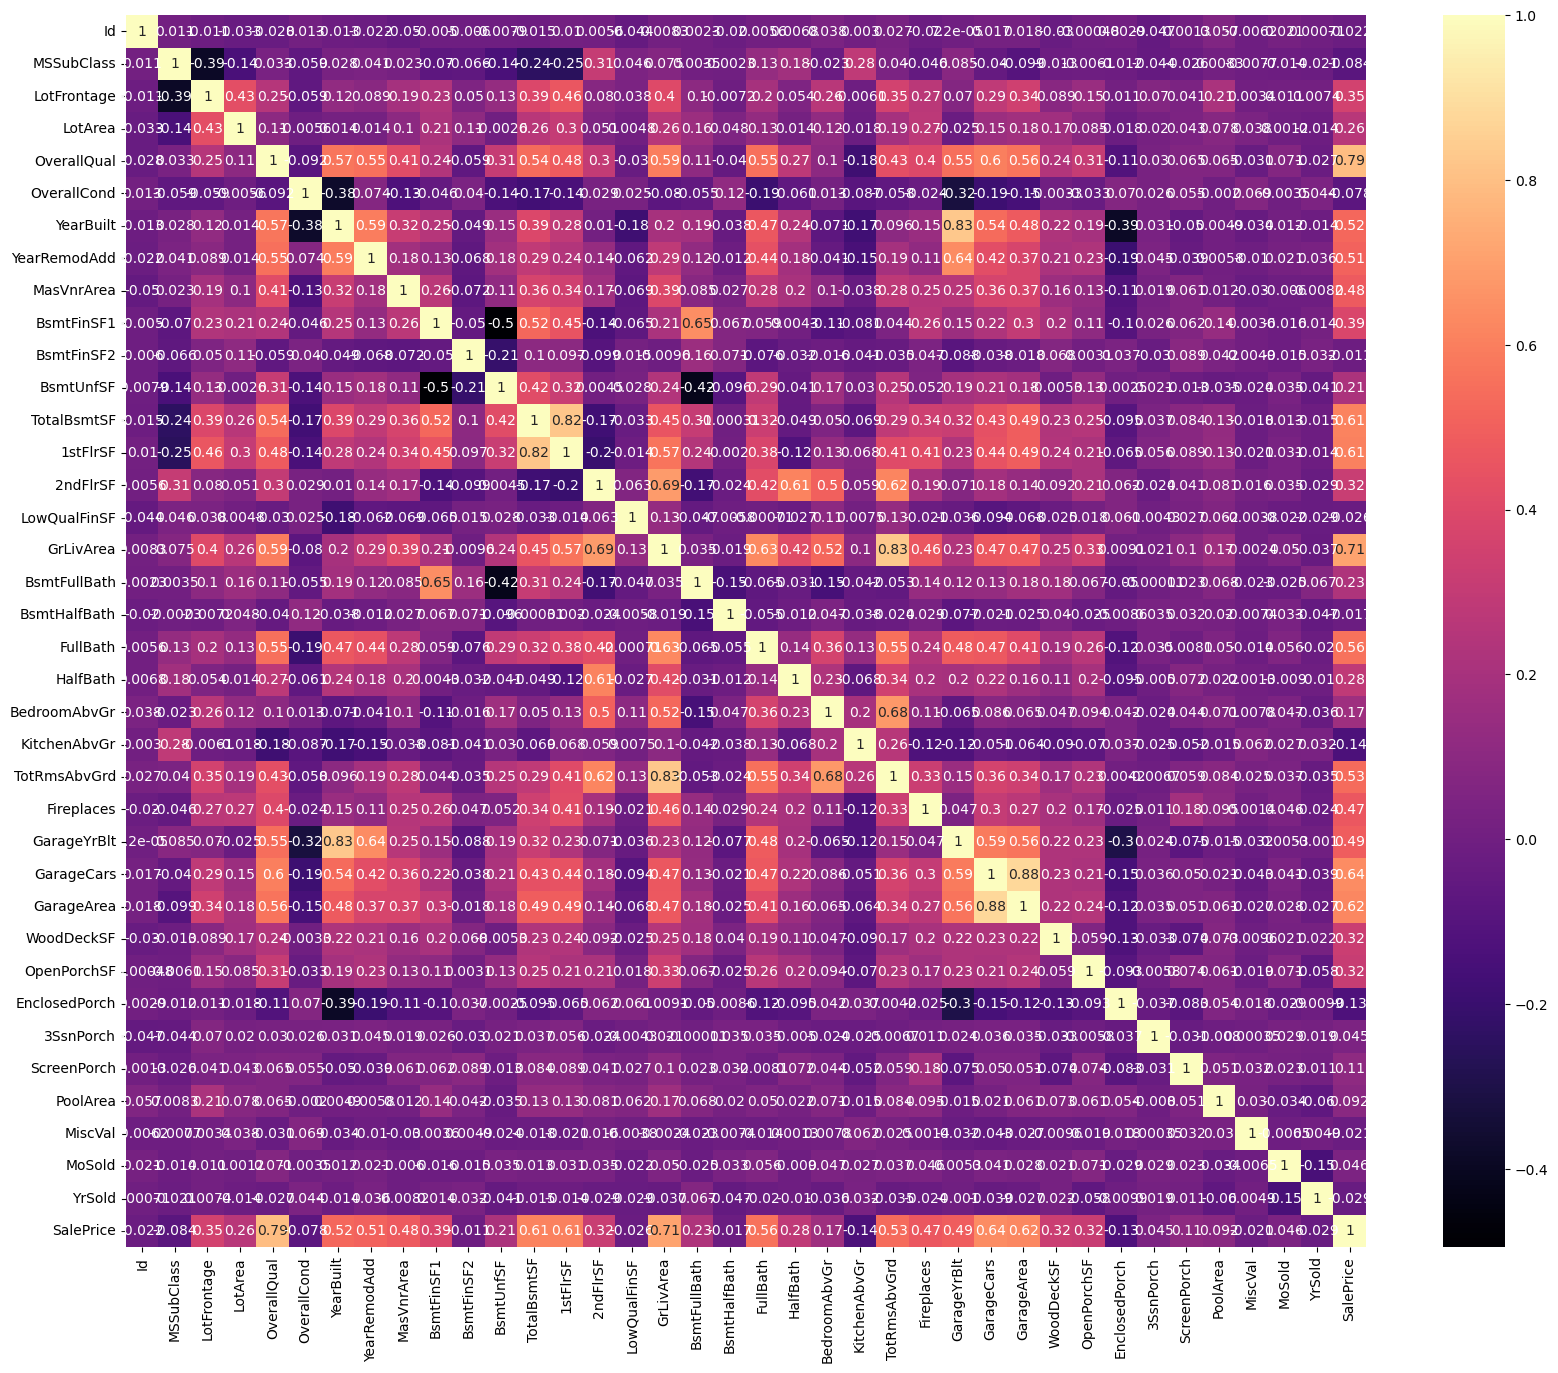

In [88]:
plt.figure(figsize=(20,16))
sns.heatmap(numeric_df.corr(), cmap='magma' ,annot=True)
plt.show()

**Inference:**
  - `GarageCars` and `GarageArea` are highly correlated (0.88)
  - `GarageYrBlt` and `YearBuilt` are highly correlated (0.83)
  - `TotRmsAbvGrd` and `GrLivArea` are highly correlated (0.83)
  - `TotalBsmtSF` and `1stflrSF` are highly correlated (0.82)

### Univariate and Bivariate Analysis - Numerical Features

#### Analyzing Numerical Features with continuous values

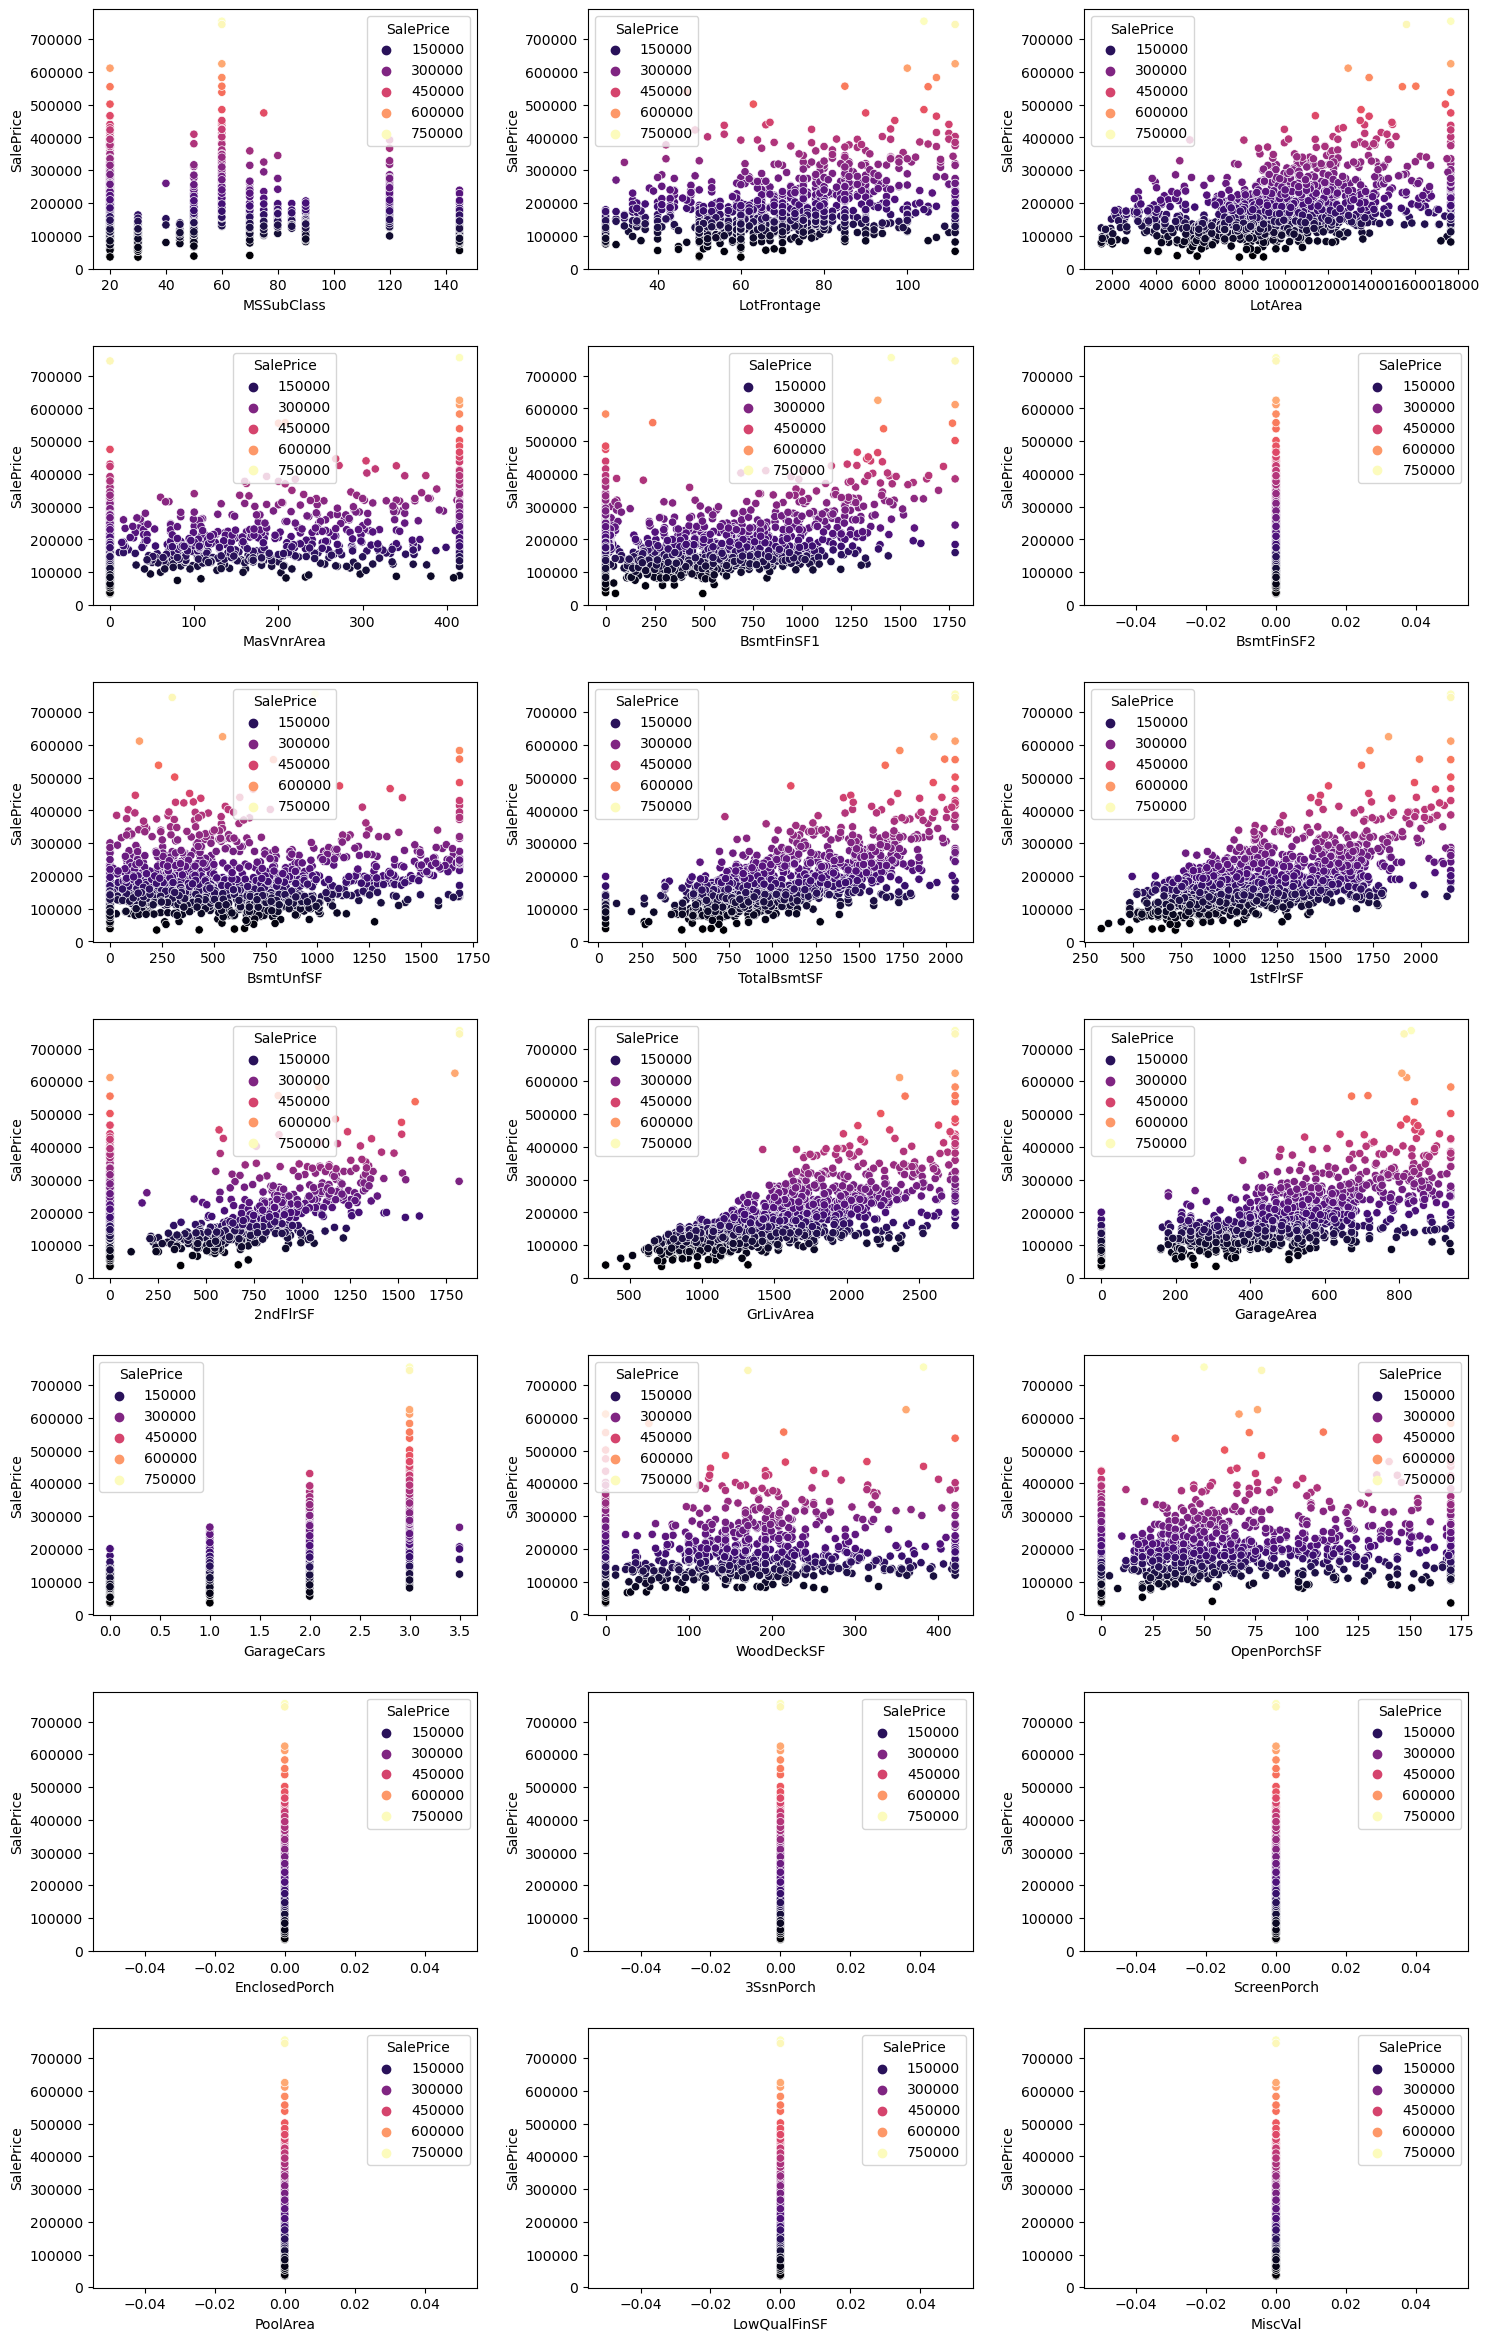

In [89]:
fig,axs=plt.subplots(figsize=(15, 30))
for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'LowQualFinSF','MiscVal']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
#     sns.scatterplot(y=housing_df['SalePrice'], x=housing_df[feature], palette='magma')
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'], hue=housing_df['SalePrice'],data=housing_df,palette='magma')
    plt.tight_layout()

**Inference:**
  - `LotFrontage`, `LotArea`, `BsmtFinSF1`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `GrLivArea`, `GarageArea` are showing positive correlation with `SalePrice`
  - `BsmtFinSF2`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `LowQualFinSF` and `MiscVal` has single value and do not show any linear pattern, hence can be dropped
  - Rest of features show not pattern and are scattered.

#### Visualizing the distribution of the numeric features

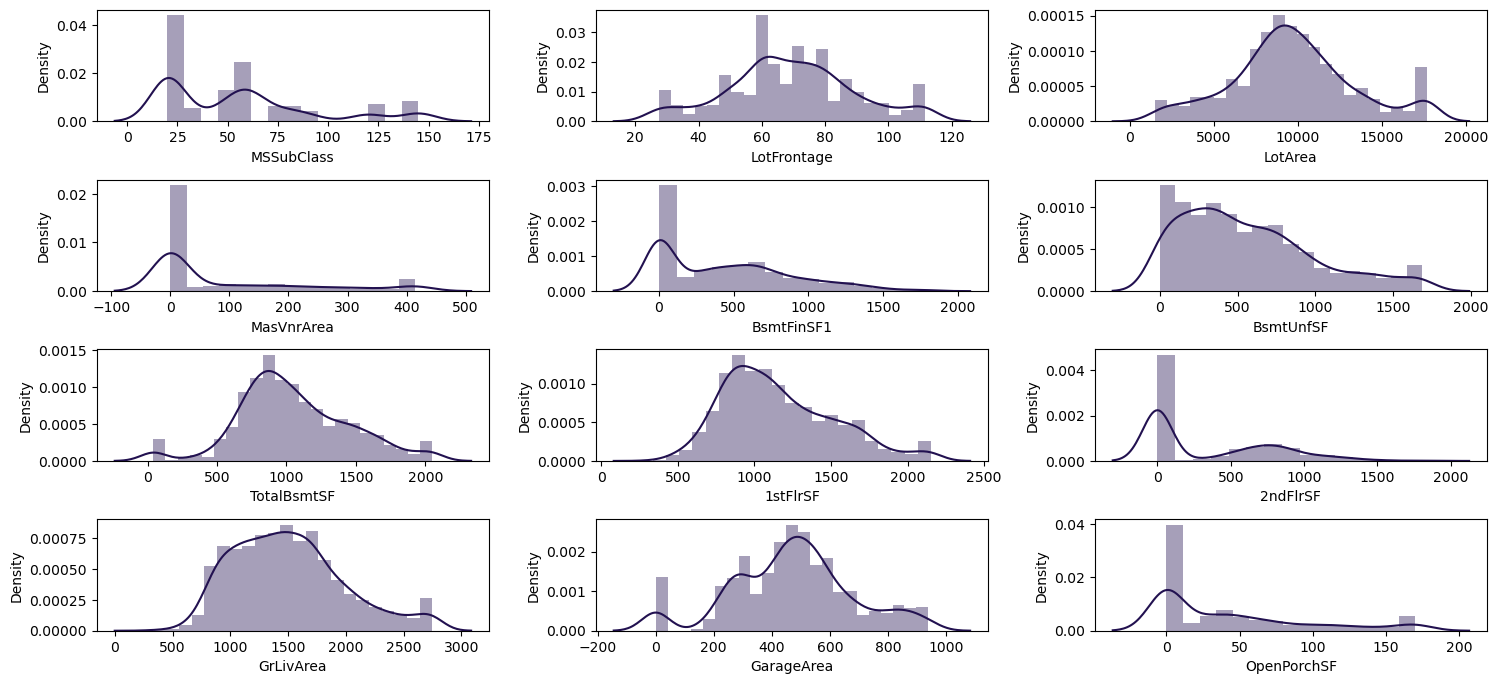

In [90]:
fig=plt.subplots(figsize=(15, 15))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.set_palette('magma')
    sns.distplot(housing_df[feature])
    plt.tight_layout()

In [91]:
# Removing these features having fixed values as they won't contribute in predicting SalePrice

housing_df[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()

,LowQualFinSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
#since the count of occurrences for the following column percentage of total

housing_df[['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].value_counts(normalize=True)

LowQualFinSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal
0             0              0          0            0         0          1.0
dtype: float64

In [93]:
housing_df.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
housing_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

#### Analyzing Numerical Features with Independent Discrete Values

In [94]:
housing_df[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]


,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,0,2,1,3.0,1,8,0.0,2003.0,2003,2003
1,6,7.5,5,2007,0.0,0,2,0,3.0,1,6,1.0,1976.0,1976,1976
2,7,5.0,9,2008,1.0,0,2,1,3.0,1,6,1.0,2001.0,2001,2002
3,7,5.0,2,2006,1.0,0,1,0,3.0,1,7,1.0,1998.0,1915,1970
4,8,5.0,12,2008,1.0,0,2,1,4.0,1,9,1.0,2000.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,0,2,1,3.0,1,7,1.0,1999.0,1999,2000
1456,6,6.0,2,2010,1.0,0,2,0,3.0,1,7,2.0,1978.0,1978,1988
1457,7,7.5,5,2010,0.0,0,2,0,4.0,1,9,2.0,1941.0,1941,2006
1458,5,6.0,4,2010,1.0,0,1,0,2.0,1,5,0.0,1950.0,1950,1996


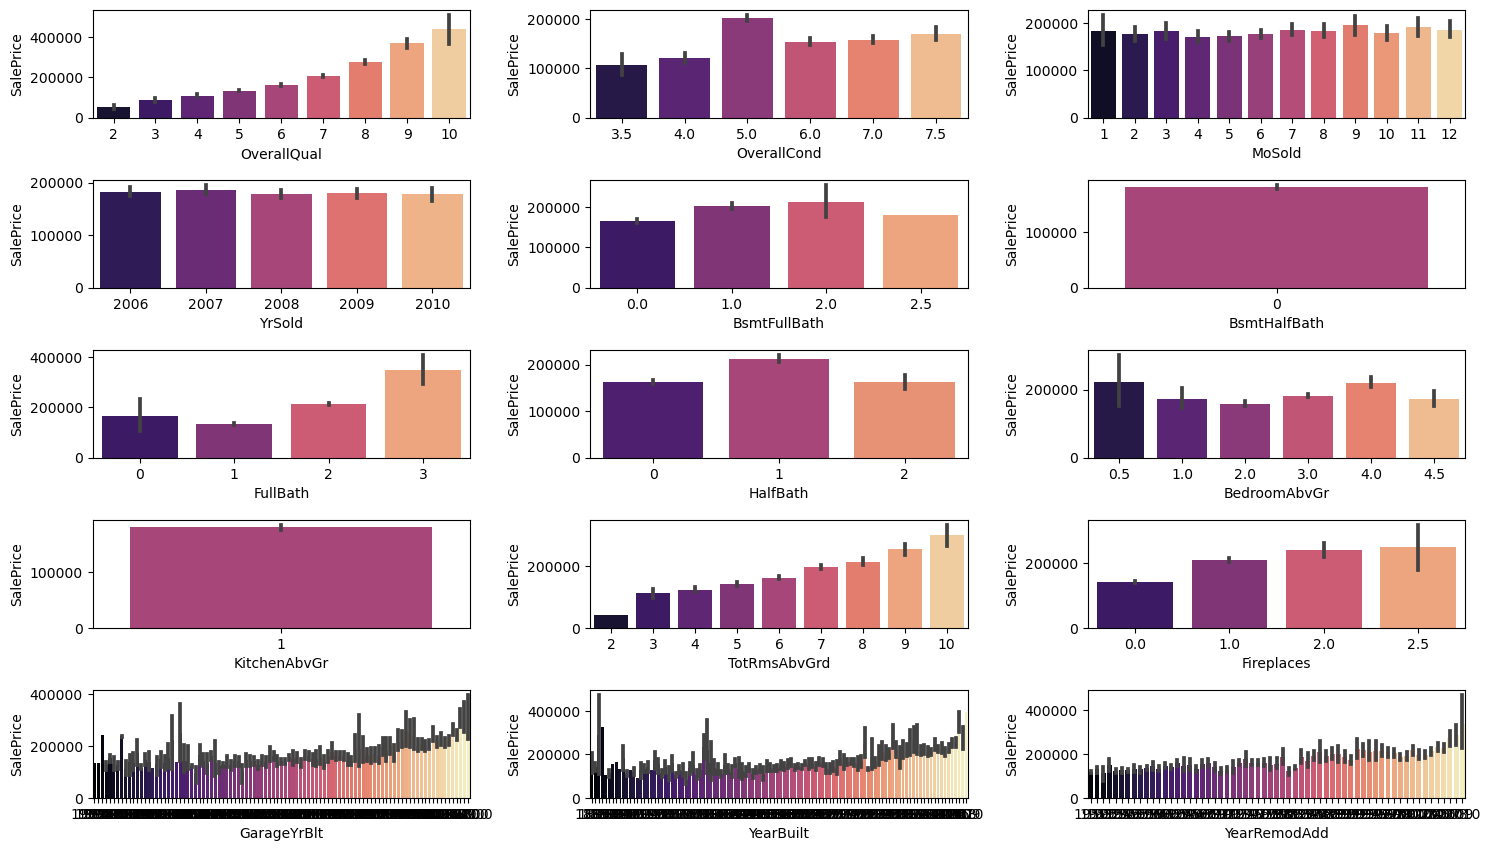

In [95]:
fig=plt.subplots(figsize=(15, 15))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(x=housing_df[feature], y=housing_df['SalePrice'], palette='magma')
    plt.tight_layout()

**Inference:**

 - `OverallQual` : As the rating of this feature increases, the SalePrice (target variable) increases

 - `OverallCond` : SalePrice is highest for rating 5

 - `MoSold` and `YrSold`: SalePrice does not show a strong trend depending on month and year on which realty is sold
 - `BsmtFullBath` = 2 and `BsmtHalfBath` = 0 have highest SalePrice

 - `FullBath` = 2 and `HalfBath` = 1 have highest SalePrice

 - `TotRmsAbvGrd` : As the number of total rooms above grade increase the SalePrice also increases

 - `GarageYrBlt`,`YearBuilt`,`YearRemodAdd`, `YrSold` : Will extract new features from to identify any trend

 - `BsmtFullBath`, `KitchenAbvGr` : Need further inspection for meaningful insight

In [96]:
print(housing_df[['KitchenAbvGr','BsmtHalfBath']].value_counts(normalize=True))

KitchenAbvGr  BsmtHalfBath
1             0               1.0
dtype: float64


In [97]:
# dropping KitchenAbvGr for not having useful information
housing_df.drop(['KitchenAbvGr','BsmtHalfBath'], axis=1, inplace=True)

In [98]:
# Derived Age column the year related features into number of years

housing_df['Age'] = housing_df['YrSold'] - housing_df['YearBuilt']

In [99]:
# Converting the year related features into number of years
import datetime

current_year = datetime.datetime.now().year
for feature in ['GarageYrBlt','YearRemodAdd']:
    housing_df[feature] = current_year - housing_df[feature]

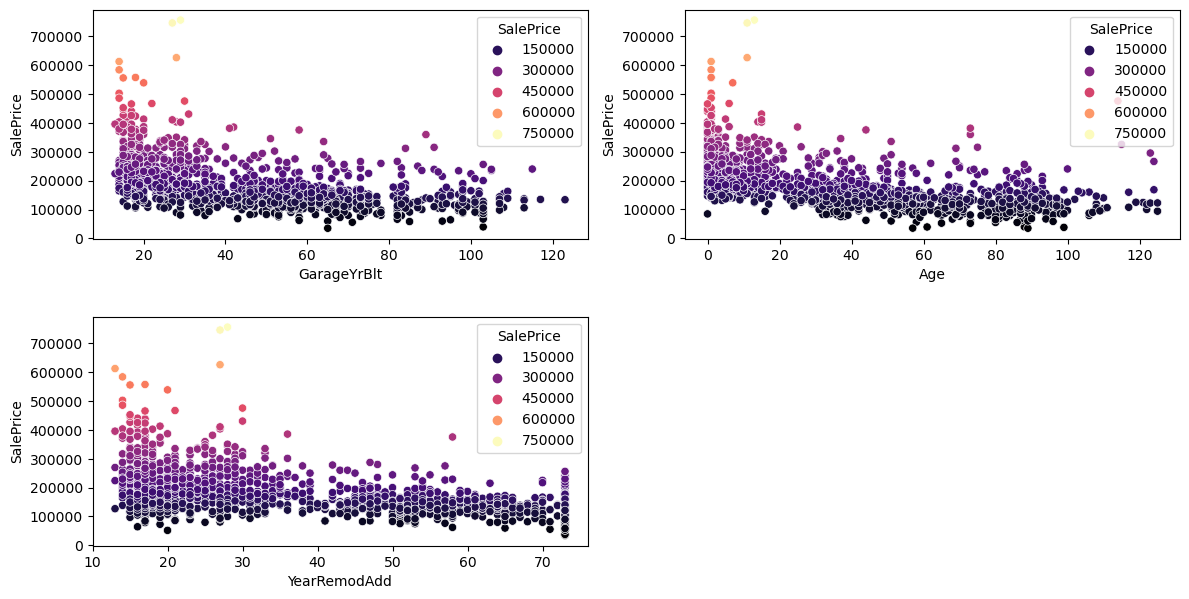

In [100]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','Age','YearRemodAdd']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(x=housing_df[feature], y=housing_df['SalePrice'], hue=housing_df['SalePrice'],data=housing_df,palette='magma')
    plt.tight_layout()

**Inference:**

 - `GarageYrBlt` built within last 20 years has higher SalePrice than once older ones
 - `SalePrice` is higher for the recently built houses e.i within last 20 years than the ones that that are older.
 - Recently remodelled houses (lower value of `YearRemodAdd`) have higher SalePrice

#### Missing Value Handling - Numerical Features

In [46]:
missing_percentage = {}
for feature in housing_df.select_dtypes(exclude=['object']).columns:
    if housing_df[feature].isnull().any():
        missing_percentage[feature] = round(housing_df[feature].isnull().sum()/housing_df.shape[0], 2)*100
    
pd.DataFrame({'Features':list(missing_percentage.keys()),'Percentage of Missing Value':list(missing_percentage.values())})

,Features,Percentage of Missing Value
0,LotFrontage,18.0
1,MasVnrArea,1.0
2,GarageYrBlt,6.0


In [74]:
# Since MasVnrArea has only 1% data missing, dropping rows with NULL values in MasVnrArea

housing_df = housing_df[~housing_df['MasVnrArea'].isnull()]

# Dropping Id column as it does not contribute towards predicting SalePrice
housing_df.drop(['Id'], axis=1, inplace=True)
numeric_df.drop(['Id'], axis=1, inplace=True)

In [75]:
# Checking the number of remaining columns
housing_df.columns.shape

(78,)

**Pending Inference:**

<!--  - GarageCars and GarageArea (Correlation coefficient = 0.88), dropping GarageCars
 - GarageYrBlt and YearBuilt (Correlation coefficient = 0.83), dropping GarageYrBlt for high correlation and containing missing value
 - TotRmsAbvGrd and GrLivArea (Correlation coefficient = 0.83), dropping GrLivArea
 - TotalBsmtSF and 1stflrSF (Correlation coefficient = 0.82), dropping TotalBsmtSF
 - Missing Value Imputation to be done for housing_df['LotFrontage'] after splitting data into train and test set to avoid data leakage. -->

### Analyzing Categorical Features

In [76]:
# Categorical features in the dataframe
categorical_df.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

#### Missing Value Handling - Categorical Features

In [77]:
missing_percentage = {}
for feature in housing_df.select_dtypes(include=['object']).columns:
    if housing_df[feature].isnull().any():
        missing_percentage[feature] = round(housing_df[feature].isnull().sum()/housing_df.shape[0], 2)*100
    
pd.DataFrame({'Features':list(missing_percentage.keys()),'Percentage of Missing Value':list(missing_percentage.values())})

,Features,Percentage of Missing Value
0,Alley,94.0
1,BsmtQual,3.0
2,BsmtCond,3.0
3,BsmtExposure,3.0
4,BsmtFinType1,3.0
5,BsmtFinType2,3.0
6,Electrical,0.0
7,FireplaceQu,47.0
8,GarageType,6.0
9,GarageFinish,6.0


In [107]:
housing_df['Electrical'].isnull().sum()

1

**Inference:**

 - For 'Alley', NA means 'No alley access'
 - For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 NA means 'No basement'
 - For GarageType, GarageFinish, GarageQual, GarageCond NA means 'No Garage'
 - For 'FireplaceQu' and 'Fence' NA means 'No Fireplace' and 'No fence' respectively
 - MiscFeature - NA means no additional features mentioned.
 - PoolQC - Na means No Pool

All these features will be imputed with meaningful values in place of missing data.

In [108]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(housing_df[mv_categorical_features].isnull().sum())

Alley           1369
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      690
Fence           1179
MiscFeature     1406
dtype: int64


In [109]:
# Imputing missing values with "Not_applicable"
housing_df[mv_categorical_features] = housing_df[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(housing_df[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [110]:
# dropping 'PoolQC' for very high percentage of NA
housing_df.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
housing_df.dropna(subset=['Electrical'], inplace=True)

In [111]:
missing_percentage = {}
for feature in housing_df.columns:
    if housing_df[feature].isnull().any():
        missing_percentage[feature] = round(housing_df[feature].isnull().sum()/housing_df.shape[0], 2)*100
    
pd.DataFrame({'Features':list(missing_percentage.keys()),'Percentage of Missing Value':list(missing_percentage.values())})

,Features,Percentage of Missing Value
0,LotFrontage,18.0
1,MasVnrType,1.0
2,MasVnrArea,1.0
3,GarageYrBlt,6.0
